In [9]:
import kmn
import numpy as np
from sklearn.cluster import KMeans
import time


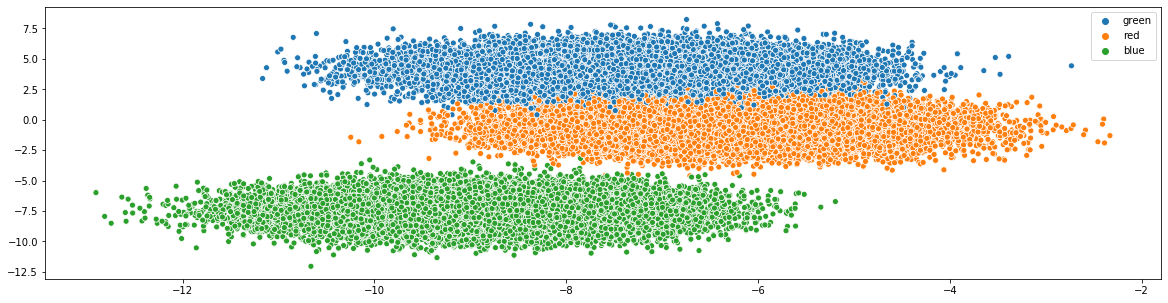

CPU times: user 3.59 s, sys: 261 ms, total: 3.85 s
Wall time: 3.54 s


In [20]:
%%time
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sb

color = np.array(["red", "green", "blue"])
X, y = make_blobs(n_samples=100000, n_features=2)

#X, y = np.random.rand(1000, 2), np.random.randint(0, 3, 1000)

def plot_preds(X, y):
    plt.figure(figsize=(20, 5))
    sb.scatterplot(X[:,0], X[:, 1], hue=color[y])
    plt.show()

plot_preds(X, y)


Time to fit 0.443875789642334


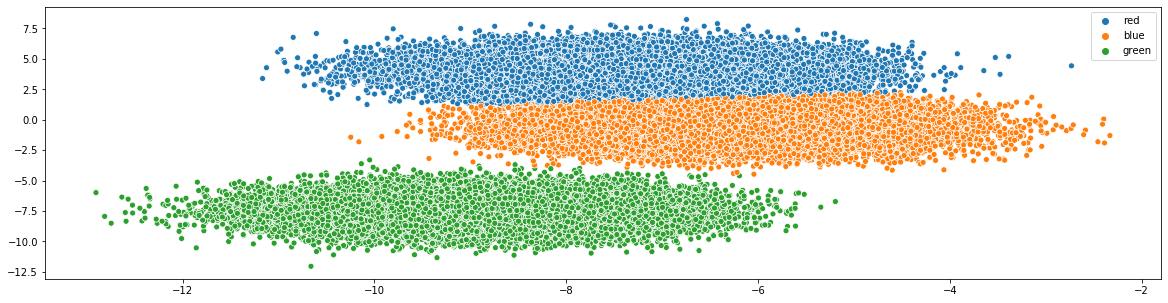

CPU times: user 5.18 s, sys: 3.28 s, total: 8.46 s
Wall time: 4.17 s


In [21]:
%%time
skl = KMeans(n_clusters=3)

timestamp = time.time()
skl.fit(X)
y = skl.predict(X)
print("Time to fit", time.time() - timestamp)


plot_preds(X, y)

Time to construct ctype matrix 0.19301915168762207
Time to construct mat 0.005912065505981445
Time to fit 0.025774478912353516
Time to fit 0.2419431209564209


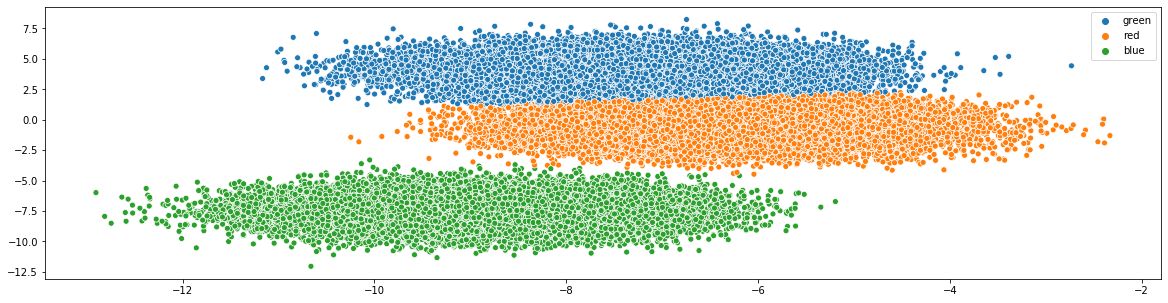

In [22]:
clf = kmn.KMN(C=3, verbose=True)
timestamp = time.time()
y = clf.fit_kmeans(X)
print("Time to fit", time.time() - timestamp)

plot_preds(X, y)

#### High dimension

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sb

#X, y = make_blobs(n_samples=500, n_features=100)

X = np.random.rand(100000, 100)

In [29]:
%%time
skl = KMeans(n_clusters=3)

timestamp = time.time()
skl.fit(X)
y = skl.predict(X)
print("Time to fit", time.time() - timestamp)


Time to fit 42.055071115493774
CPU times: user 45.7 s, sys: 8.82 s, total: 54.5 s
Wall time: 42.1 s


In [30]:
clf = kmn.KMN(C=3, verbose=True)
timestamp = time.time()
y = clf.fit_kmeans(X)
print("Time to fit", time.time() - timestamp)


Time to construct ctype matrix 2.0262749195098877
Time to construct mat 0.0176546573638916
Time to fit 0.36672496795654297
Time to fit 2.4395203590393066


#### Lets do KNN

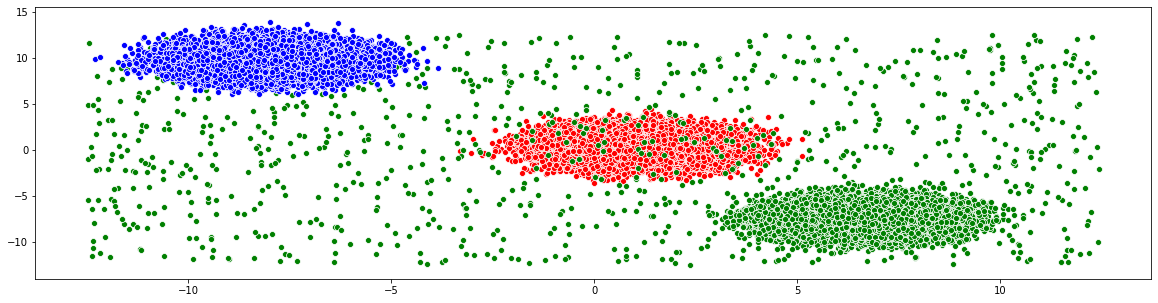

In [4]:
from sklearn.datasets import make_blobs

color = np.array(["red", "green", "blue"])
X, y = make_blobs(n_samples=100000, n_features=2)


test = (np.random.rand(1000, 2) - 0.5) * 25

#X, y = np.random.rand(1000, 2), np.random.randint(0, 3, 1000)

    
def plot_pred_test(X, y, T, p):
    plt.figure(figsize=(20, 5))
    for i, c in enumerate(color):
        xl = y == i
        pl = p == i 
        
        XC = X[xl]
        TC = T[pl]

        if XC.size != 0:
            sb.scatterplot(XC[:,0], XC[:, 1], color=color[i])
        
        if TC.size != 0:
            sb.scatterplot(TC[:,0], TC[:, 1], color=color[i])
            
    plt.show()

plot_pred_test(X, y, test, np.ones(1000, dtype=np.int))

Time to fit 0.05075669288635254
Time to predict 0.026241540908813477


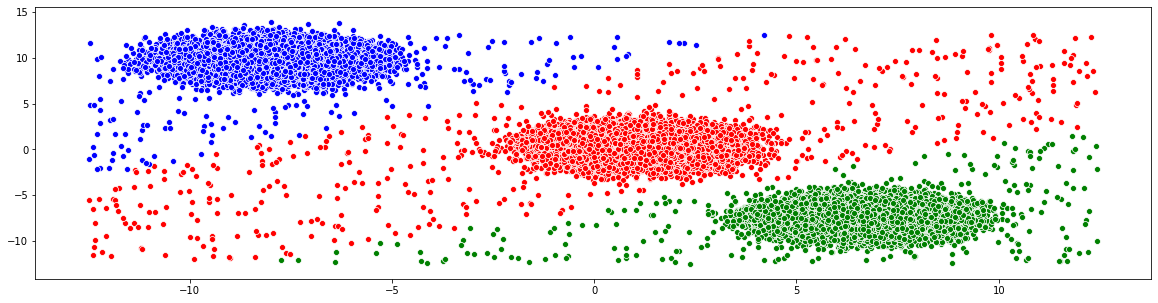

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

timestamp = time.time()
clf.fit(X, y)
print("Time to fit", time.time() - timestamp)

timestamp = time.time()
p = clf.predict(test)
print("Time to predict", time.time() - timestamp)


plot_pred_test(X, y, test, p)

Time to construct ctype matrix 0.4197962284088135
Time to construct mat 0.009503364562988281
Time to fit 0.0006461143493652344
Time to fit 0.4650297164916992
Time to construct ctype matrix 0.0017123222351074219
Time to construct mat 0.00032019615173339844
Time to predict 0.9535298347473145


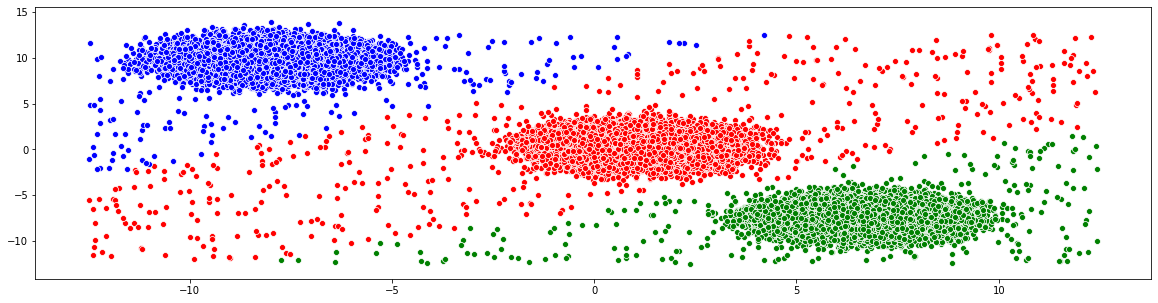

In [7]:

clf = kmn.KMN(verbose=True)

timestamp = time.time()
clf.fit_knn(X, y)
print("Time to fit", time.time() - timestamp)

timestamp = time.time()
p = clf.predict_knn(test, k =5)
print("Time to predict", time.time() - timestamp)


plot_pred_test(X, y, test, p)

### KNN on higher dim

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import time

color = np.array(["red", "green", "blue"])
X, y = make_blobs(n_samples=200000, n_features=25)


test = (np.random.rand(1000, 25) - 0.5) * 25

In [5]:

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

timestamp = time.time()
clf.fit(X, y)
print("Time to fit", time.time() - timestamp)

timestamp = time.time()
p = clf.predict(test)
print("Time to predict", time.time() - timestamp)


Time to fit 0.48847270011901855
Time to predict 17.61784863471985


In [6]:
import kmn

clf = kmn.KMN(verbose=True)

timestamp = time.time()
clf.fit_knn(X, y)
print("Time to fit", time.time() - timestamp)

timestamp = time.time()
p = clf.predict_knn(test, k =5)
print("Time to predict", time.time() - timestamp)



Time to construct ctype matrix 1.3581602573394775
Time to construct mat 0.020105838775634766
Time to fit 0.0035114288330078125
Time to fit 1.4399487972259521
Time to construct ctype matrix 0.004936933517456055
Time to construct mat 0.00028395652770996094
Time to predict 9.536431550979614
